data URL : https://www.kaggle.com/mirichoi0218/insurance 


Objective


1.   read csv
2.   analyze data
3.   classify smoker (y/n)





# read data

In [68]:
#read data from: https://www.kaggle.com/mirichoi0218/insurance

import pandas as pd
df=pd.read_csv('smoker.csv') #store data in df
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# analyze data

In [40]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#no missing data

In [42]:
#show columns

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

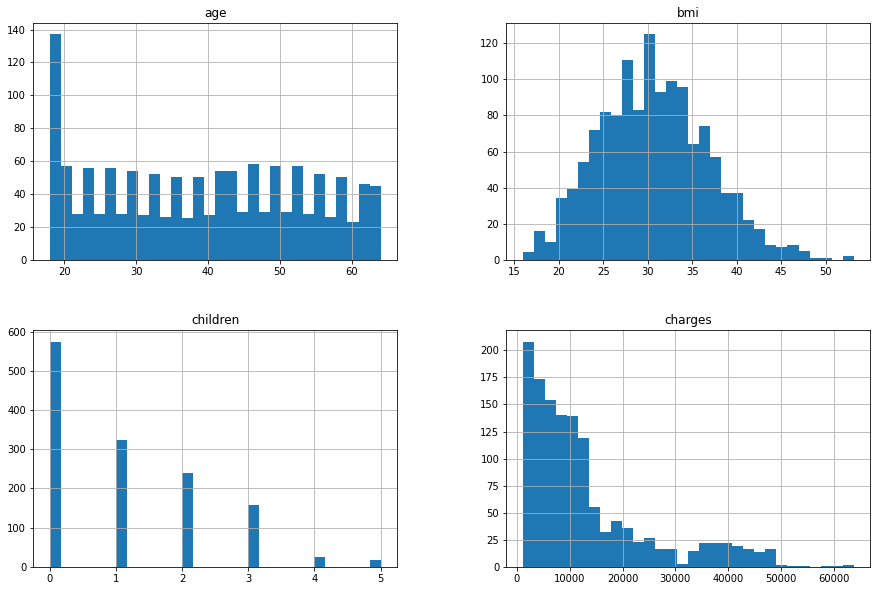

In [43]:
#distabution of numeric variables
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas as pd
from pandas import Series, DataFrame
df.hist(bins=30,figsize=(15,10),grid=True);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


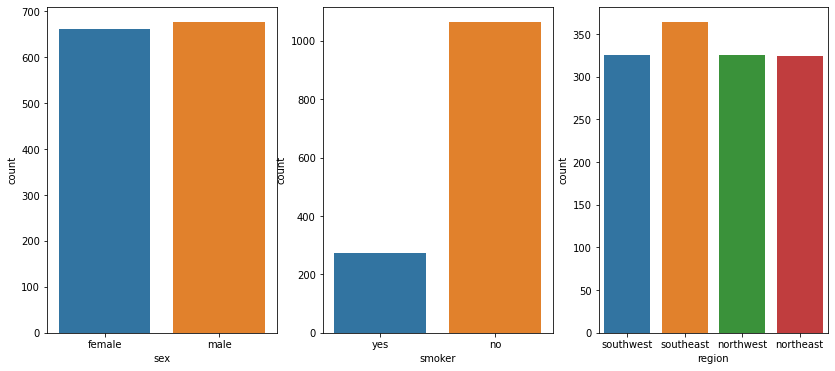

In [44]:
#distabution of catagorical variables
plt.figure(figsize=(14,6))
plt.subplot(1, 3, 1)
sns.countplot(df['sex'])
plt.subplot(1, 3, 2)
sns.countplot(df['smoker'])
plt.subplot(1, 3, 3)
sns.countplot(df['region'])

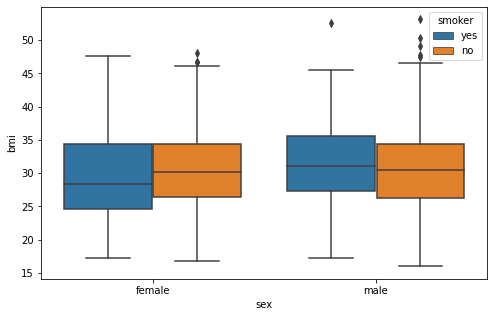

In [24]:
#data variety in terms of sex and smoker 
plt.figure(figsize=(8,5))
sns.boxplot(x='sex', y='bmi', hue="smoker",data=df)

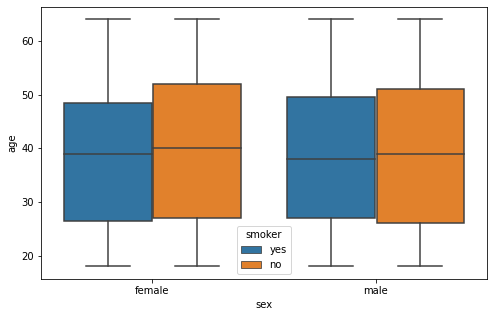

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x='sex', y='age', hue="smoker",data=df)

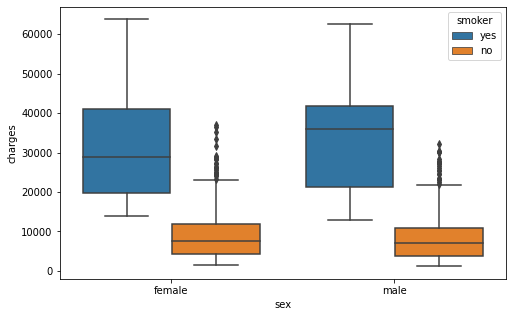

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='sex', y='charges', hue="smoker",data=df)

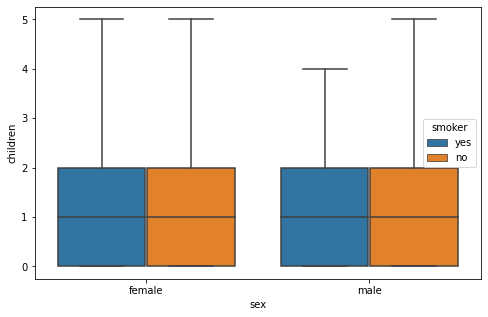

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(x='sex', y='children', hue="smoker",data=df)

# train a model

In [69]:
#deal with catagorical data (sex, region)
dummy1=pd.get_dummies(df['region'])
df = pd.concat([df, dummy1], axis = 1)
dummy2=pd.get_dummies(df['sex'])
df = pd.concat([df, dummy2], axis = 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1,0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1,0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,0,0,1


In [70]:
#grop sex and region
df.drop(['sex', 'region'], axis = 'columns', inplace=True) 
df.head()

,age,bmi,children,smoker,charges,northeast,northwest,southeast,southwest,female,male
0,19,27.900,0,yes,16884.92400,0,0,0,1,1,0
1,18,33.770,1,no,1725.55230,0,0,1,0,0,1
2,28,33.000,3,no,4449.46200,0,0,1,0,0,1
3,33,22.705,0,no,21984.47061,0,1,0,0,0,1
4,32,28.880,0,no,3866.85520,0,1,0,0,0,1


In [72]:
#define x and y
y=df['smoker']
x=df.drop(['smoker'],axis='columns')
x

,age,bmi,children,charges,northeast,northwest,southeast,southwest,female,male
0,19,27.900,0,16884.92400,0,0,0,1,1,0
1,18,33.770,1,1725.55230,0,0,1,0,0,1
2,28,33.000,3,4449.46200,0,0,1,0,0,1
3,33,22.705,0,21984.47061,0,1,0,0,0,1
4,32,28.880,0,3866.85520,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0,0,0,1
1334,18,31.920,0,2205.98080,1,0,0,0,1,0
1335,18,36.850,0,1629.83350,0,0,1,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,1,1,0


In [73]:
y.head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

In [74]:
#split data (train/test)

from sklearn.model_selection import train_test_split
#testing data size is of 33% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.33, random_state =5)

In [75]:
#run decision tree

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train, y_train)

In [78]:
list(x.columns)

['age',
 'bmi',
 'children',
 'charges',
 'northeast',
 'northwest',
 'southeast',
 'southwest',
 'female',
 'male']

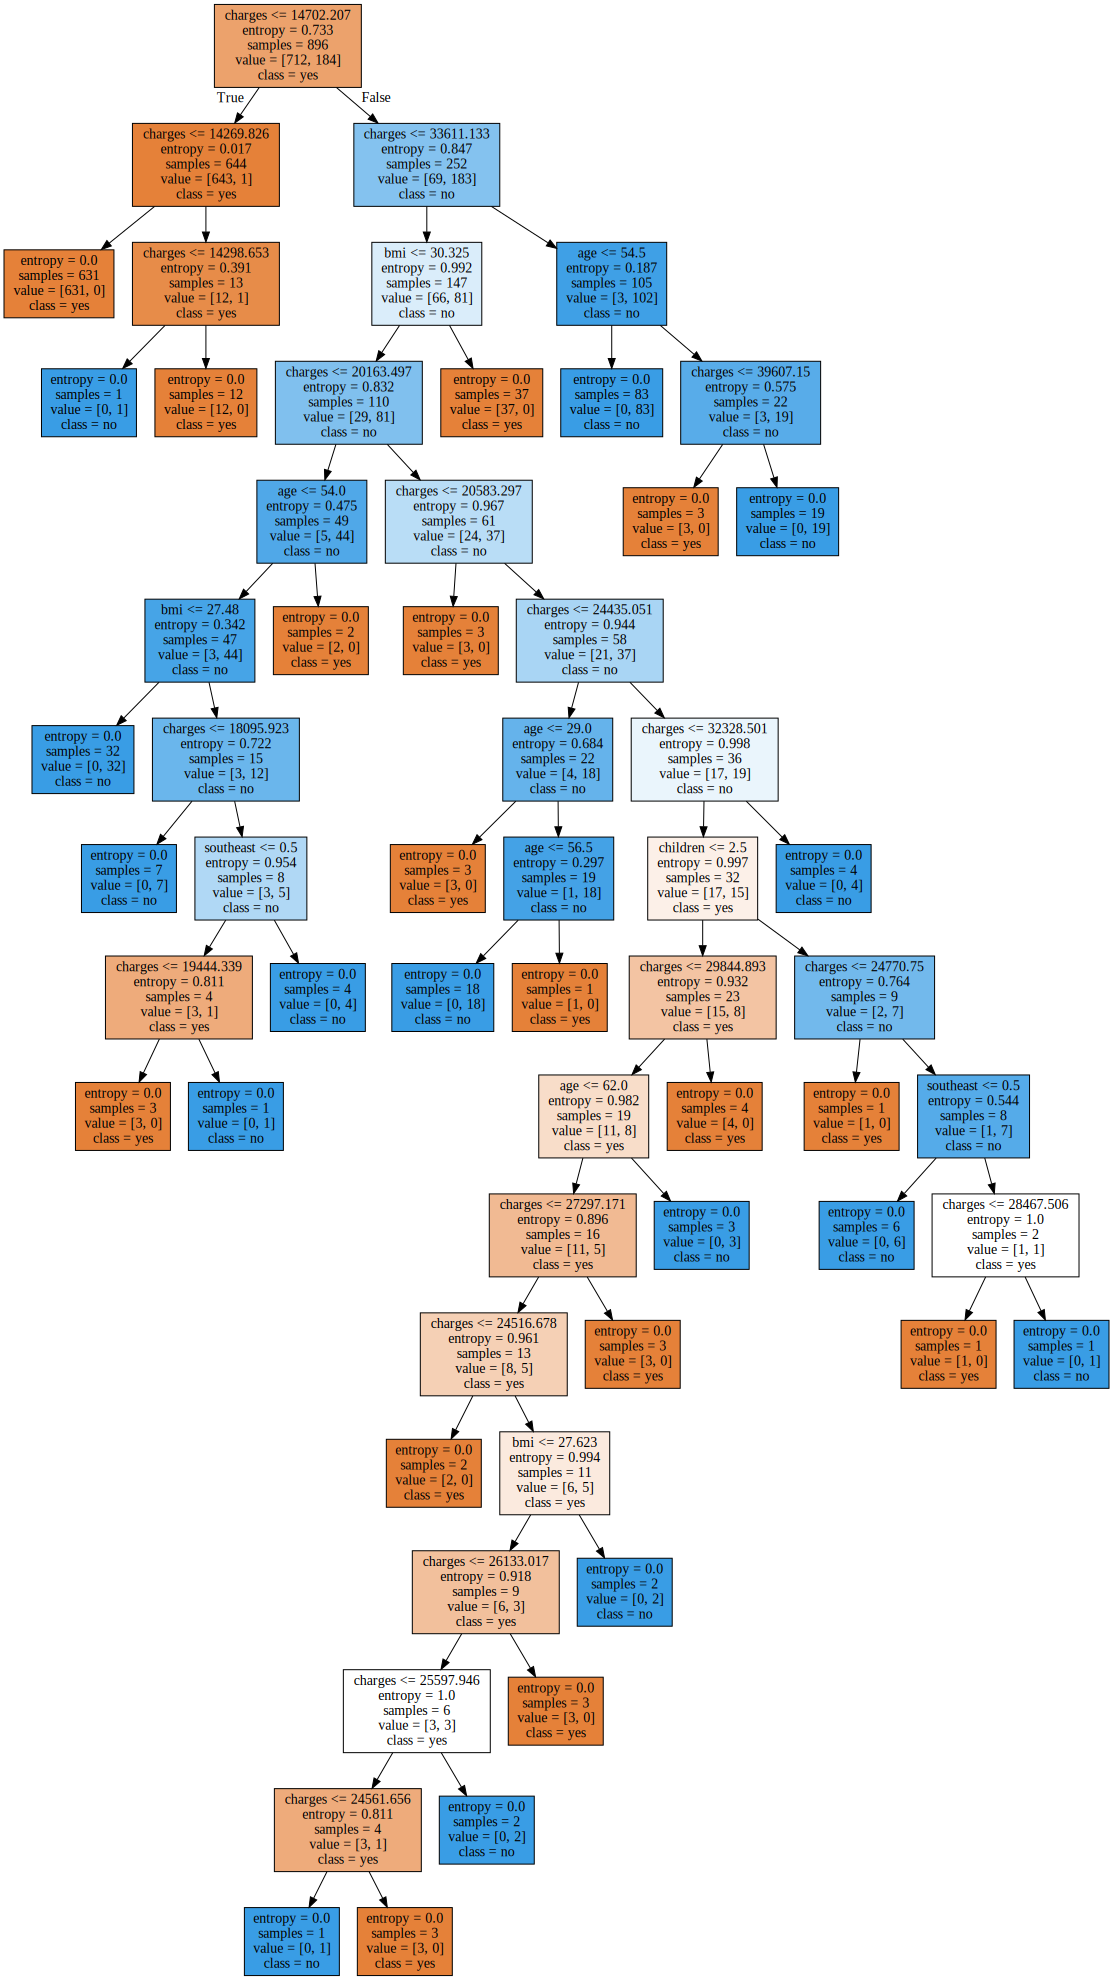

In [79]:
#show decision tree

import graphviz 
class_name = [str(s) for s in y.unique()]
dot_data = tree.export_graphviz(clf, 
                                out_file=None,
                                feature_names=list(x.columns),
                                class_names=class_name, 
                                filled=True
                                ) 
graph = graphviz.Source(dot_data) 
graph

In [81]:
#evauation of training dataset

#1. cross validation
from sklearn.model_selection import cross_val_score #cross validation
#define number of CV
if len(df)>300:
  numCV=10
else:
  numCV=5
  
scores = cross_val_score(clf, x_train, y_train, cv=numCV) #% confidence
for score in scores:
  print(score)

print('mean score:',scores.mean())
print('std score:', scores.std())

0.9555555555555556
0.9777777777777777
0.9333333333333333
0.9555555555555556
0.9666666666666667
0.9222222222222223
0.9550561797752809
0.9662921348314607
0.9887640449438202
0.9325842696629213
mean score: 0.9553807740324596
std score: 0.01991964856653702


In [82]:
#2. by acc score
from sklearn.metrics import accuracy_score
accuracy_score(y_train, clf.predict(x_train))

1.0

In [83]:
# acc score of test dataset
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf.predict(x_test))

0.9479638009049773

# result

In [ ]:
#acc train = 1.0
#acc test = 0.948
#this model is slightly overfitting